In [1]:
import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.tsv", delimiter="\t")
df_test=pd.read_csv("test.tsv", delimiter="\t")

In [3]:
df_train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [4]:
df_test.head()

PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine

In [5]:
print(df_train.shape, df_test.shape)

(156060, 4) (66292, 3)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [8]:
df_train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [9]:
df_test.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

In [10]:
df_train['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [11]:
df_train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0.5, 1.0, '')

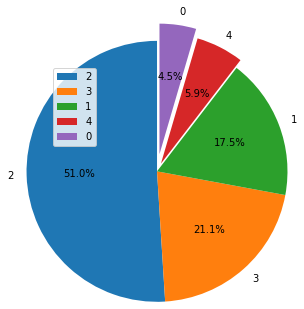

In [12]:
plt.pie(df_train.Sentiment.value_counts(), labels=df_train.Sentiment.value_counts().index, 
        radius=1.5, autopct='%1.1f%%', startangle=90, explode=(0,0,0,0.1,0.2))
plt.legend()
plt.title("")

#this dataset is an imbalanced dataset.

In [13]:
df_train['token_length']=[len(x.split(" ")) for x in df_train.Phrase]
max(df_train.token_length)

52

In [14]:
df_train.loc[df_train.token_length.idxmax(),'Phrase']

'It cuts to the core of what it actually means to face your fears , to be a girl in a world of boys , to be a boy truly in love with a girl , and to ride the big metaphorical wave that is life -- wherever it takes you .'

In [15]:
df_train.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  token_length  
0          1            37  
1          2            14  
2          2             2  
3          2             1  
4          2             1

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shuhgyta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shuhgyta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shuhgyta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
stop_words = (stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

In [18]:
def sentencePreprocessing(text):
    filter_sentence=''
    
    #text=row['Phrase']
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[[:punct:]]',' ',text)
    
    tokens=nltk.word_tokenize(text)
    
    tokens = [t for t in tokens if t not in stop_words]
    print(tokens)
    lemmatizer=WordNetLemmatizer()
    for token in tokens:
        filter_sentence=filter_sentence + " "+ str(lemmatizer.lemmatize(token)).lower()
    
    return filter_sentence


In [19]:
df_train['Phrase'] = df_train['Phrase'].apply(lambda sentence: sentencePreprocessing(sentence))

C:\Users\Shuhgyta\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Possible nested set at position 1
  


['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']
['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose']
['A', 'series']
['A']
['series']
['escapades', 'demonstrating', 'adage', 'good', 'goose']
[]
['escapades', 'demonstrating', 'adage', 'good', 'goose']
['escapades']
['demonstrating', 'adage', 'good', 'goose']
['demonstrating', 'adage']
['demonstrating']
['adage']
[]
['adage']
['good', 'goose']
[]
['good', 'goose']
[]
['good', 'goose']
[]
['good', 'goose']
['good']
['goose']
[]
['goose']
['goose']
['also', 'good', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']
['also', 'good', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']
['also']
['also']
['good', 'gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']
['gander', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story']
['gander', 'occasio

In [20]:
df_train=df_train[['Phrase','Sentiment']]

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
X_train = df_train['Phrase']
Y_train = df_train['Sentiment']
df_train.head()

Phrase  Sentiment
0   a series escapade demonstrating adage good go...          1
1   a series escapade demonstrating adage good goose          2
2                                           a series          2
3                                                  a          2
4                                             series          2

In [23]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [24]:
test_counts = count_vectorizer.transform(df_test['Phrase'].values)
test_tfidf = tfidf.transform(test_counts)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tf_idf_matrix, Y_train, random_state=42)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print("*************************************")
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

Accuracy of Lasso classifier on training set: 0.68
Accuracy of Lasso classifier on test set: 0.63
*************************************
[[  324   869   492    53     2]
 [  171  2403  3951   319    10]
 [   39   968 17401  1184    43]
 [    4   196  4002  3882   300]
 [    0    23   390  1405   584]]
              precision    recall  f1-score   support

           0       0.60      0.19      0.28      1740
           1       0.54      0.35      0.42      6854
           2       0.66      0.89      0.76     19635
           3       0.57      0.46      0.51      8384
           4       0.62      0.24      0.35      2402

    accuracy                           0.63     39015
   macro avg       0.60      0.43      0.47     39015
weighted avg       0.62      0.63      0.60     39015

0.6303729334871203


In [26]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, Y_train)
y_pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, Y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, Y_test)))
print("*************************************")
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

Accuracy of NB  classifier on training set: 0.63
Accuracy of NB classifier on test set: 0.58
*************************************
[[   69   749   889    33     0]
 [   38  1794  4812   210     0]
 [    8   810 17608  1194    15]
 [    0   118  5005  3202    59]
 [    0    10   847  1423   122]]
              precision    recall  f1-score   support

           0       0.60      0.04      0.07      1740
           1       0.52      0.26      0.35      6854
           2       0.60      0.90      0.72     19635
           3       0.53      0.38      0.44      8384
           4       0.62      0.05      0.09      2402

    accuracy                           0.58     39015
   macro avg       0.57      0.33      0.34     39015
weighted avg       0.57      0.58      0.53     39015

0.5842624631551967
